# Keşifçi Veri Analizi ve Veri Görselleştirme
* Basit bir grafik, veri analistinin zihnine diğer herhangi bir cihazdan daha fazla bilgi getirir. (John Tukey)
* Çalışmaya başlamadan önce, veri genel hatlarıyla temsili olarak önümüze konulması gerekmektedir.
* **Keşifçi Veri Analizi:** Betimsel istatistikler, veri görselleştirme teknikleri ve iş çıktısı hedefiyle veri üzerinde çalışmaktır.


# Veriye İlk Bakış
Veri ilk karşımıza düştüğünde ne yapmalıyız, nereye bakmalıyız , hangi noktaya bakmalıyım, veriyi ilk olarak nasıl analayabilirim gibi konularda bazı kararsızlıklar yaşayabiliriz. Elimize herhangi bir veri seti geldiğinde ilk yapmamız gereken adımlar nelerdir bu bölümde onları inceleyeceğiz.

Veri Setinin Yapısını İncelemeliyiz.

In [324]:
#Veri setinin hikayesi nedir?
#veri seti nasıl oluştu, nasıl toplandı, hangi değişken nasıl oluştu bilmemiz gerekiyor ki ileride bu değişkenler üzerinde analiz yapacağız, birşeyler inşa edeceğiz.
#değişkenlerin türleri nelerdir?
#ayrıca veri seti üzerindeki merkezi eğilim ve dağılım ölçülerini de ilk etapta gözlemleyerek veri seti hakkında daha detaylı bilgilere sahip olabiliriz.

In [325]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds') #seaborn kütüphanesindeki diamonds verisetini import edelim.
df = diamonds.copy() #her ihtimale karşı yedekleyelim
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Seti Hikayesi**
Mücevherlerle ilgili bir veri setimiz var, mücevherlerle ilgili bizlere bilgi sunmaktadır.

price: dolar cinsinde fiyat ($326–$18,823) ***

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best)) (yinre kalitesi ile ilgili bilgi sunar)

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) (yine kalitesi ile ilgili fikir verir)

x: length in mm (0–10.74) #yapısal özellik

y: width in mm (0–58.9) #yapısal özellik

z: depth in mm (0–31.8) #yapısal özellik

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

**Veri Setine Hızlı Bakış**

In [326]:
df.shape

(53940, 10)

In [327]:
df.info() 
#kaba bir şekide veri setinin tüm yapısal bilgilerini verir.
#bir pandas dataframe şeklindeymiş
#53940 adet gözlem değerimiz varmış
# 10 değişkenimiz varmış, değişkenlerin tipleri belirtilmiş
#Ramda 3MB alan tutmuş

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [328]:
df.describe().T #sürekli (sayısal) değişkenlerin betimsel özelliklerine bakalım

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [329]:
#hiç eksik gözlem(değer) var mı
df.isnull().values.any() # isnull() values üzerinde bir sorgulama yap herhangi birisinde (any) eksik değer varsa true olarak dön.

False

In [330]:
df.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir. Hangi değişkende ne kadar eksik var sorusuna cevap alırız.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [331]:
kat_df = df.select_dtypes(include = ["category"]) #select_dtypes () dataframe içerisinden istediğimiz türe göre değişken seçmek için kullanılır.

In [332]:
kat_df.head(5)

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [333]:
df["cut"].value_counts().index

CategoricalIndex(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=False, dtype='category')

In [201]:
df.cut.value_counts().index #bu şekilde de kullanabiliriz

CategoricalIndex(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=False, dtype='category')

In [334]:
df["cut"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.cut.value_counts() şekildede yapabiliriz

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [335]:
df["color"].value_counts() #color değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [205]:
#Elimizdeki kategorik değişkenlerin nominal değil ordinal olduğunu görüyoruz. Yani kategorik değişkenlerin sınıfları arasında farklılıklar var.
#Örneğin cut değişkeni için Fair en kötüyü İdeal en iyiyi belirtiyor.
#Örneğin Color değişkeni için j en kötüyü D en iyiyi ifade ediyor.

#Fakat value_counts().index ile CategoricalIndexleri incelediğimizde ordered kısmının false olduğunu görüyoruz. Bizim bu kategorik değişkenlerin sırasını python diline belirtmemiz gerekiyor.

In [219]:
df["cut"].head(1) 

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [206]:
#Ordinal Tanımlama

In [336]:
from pandas.api.types import CategoricalDtype #pandas.api.types'dan CategoricalDtype metodunu ekle.
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [337]:
df["cut"].head(1) 

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [338]:
color_kategoriler = ["J","I","H","G","F","E","D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))

In [339]:
df["color"].head(1) 

0    E
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

# Dağılım Grafikleri
Bu grafikler elimizdeki sürekli ve kategorik değişimlerin dağılımlarını görsel teknikler ile bize sunma imkanı sağlar. Bu grafikler aracılığıyla önemli olan yapı tanıma  işlemini gerçekleştirmiş oluruz.

## Barplot (Kategorik Değişken)
(Sütun grafik tekniği)
Elimizdeki kategorik değişkenleri görselleştirmek için kullanırız.

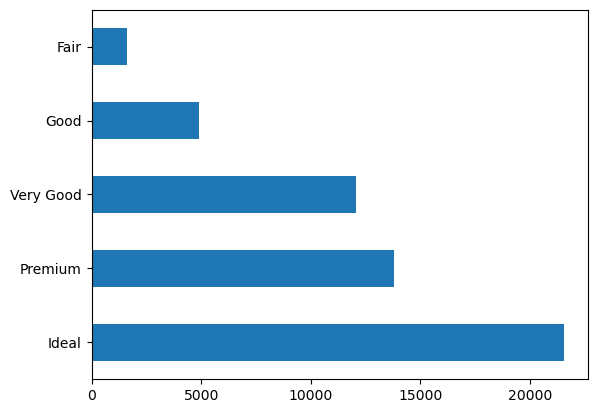

In [340]:
df["cut"].value_counts().plot.barh();

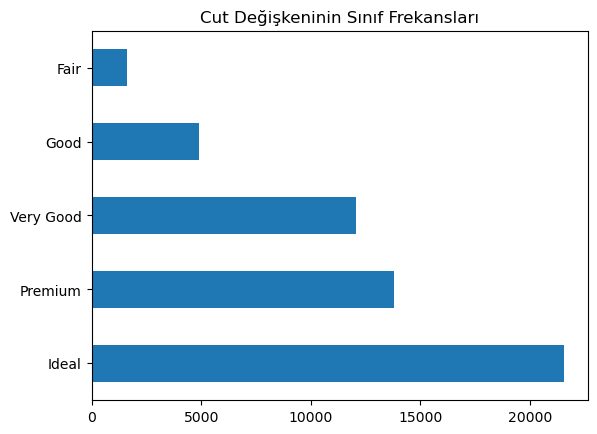

In [341]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları"); #set_title grafiğe bir başlık bilgisi eklemek için kullanılır.

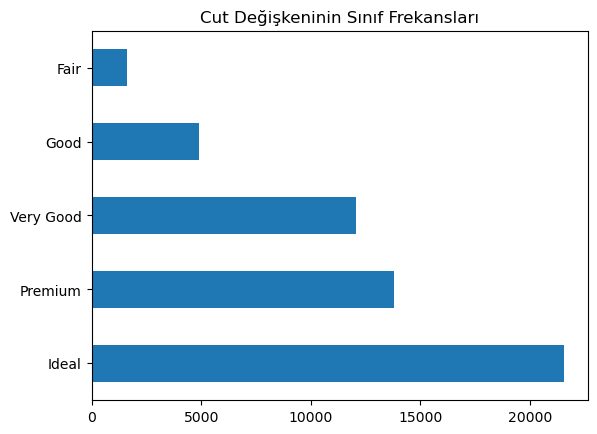

In [233]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));#ifade bu şekilde de yazılabilir

In [234]:
#üstteki iki grafik çizme pandas ile yapılan görselleştirmeydi ama biz genelde grafik işlemlerini bize hem görsel hem kullanış olarak daha fazla olanak sağlayan seaborn kütüphanesi kullanarak gerçekleştireceğiz.

#seaborn'u sns şeklinde import etmiştik

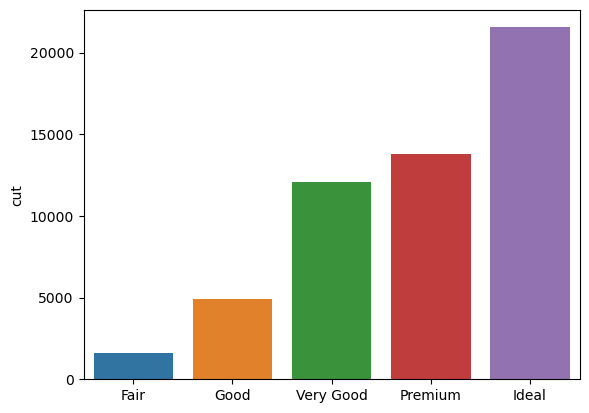

In [342]:
sns.barplot(x = df.cut.value_counts().index, y = df.cut.value_counts(), data = df); # x eksenine cut değişkenine ait kategorileri koy, y eksenine cut değişkeninin sınıflarına ait frekanları koy, verisetimiz df

## Çaprazlamalar
Veri seti içerisinde yer alan değişkenlerin etkilerinin birlikte değerlendirilmesi demektir.


In [343]:
import seaborn as sns #seaborn kütüphanesini ekle
from pandas.api.types import CategoricalDtype #pandas.api.types'dan CategoricalDtype metodunu ekle.
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
color_kategoriler = ["J","I","H","G","F","E","D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


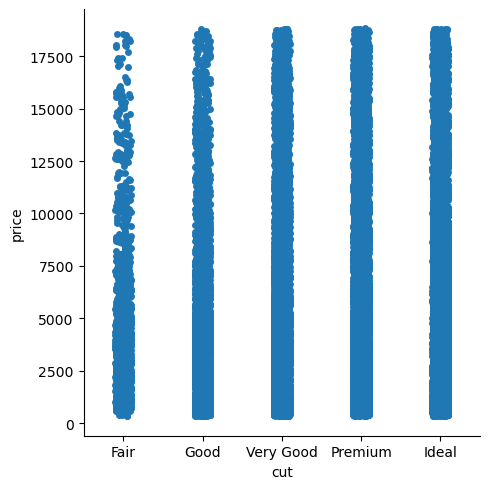

In [344]:
sns.catplot(x = "cut", y = "price", data = df);#cut kategorik değişkeni ile price değişkenini çarprazlayarak birlikte değerlendirerek görselleştirme işlemini yapalım.
                                               #catplot() fonksiyonu kategorik değişkenleri görselleştirmek için kullanılan fonksiyon.
                                               #x eksenimize "cut" değişkenini y eksenimize de "price" değişkenini koyalım

In [238]:
#price değişkeni içerisinde taşınan bilgiyi diğer değişkenlerin oluşturma ihtimali yüksek. Buna göre diyebilirz ki;
#ilk sınıfımız Fair'i inceleyelim. Price genel olarak 8000-9000 aşağısındaki alana yoğunlaşmış
#Kalite arttıkça price sürekli değişkenin daha üst sınıflarında daha çok yoğunlaşma olduğu gözlemlenir.

In [239]:
#catplot() ile barplot() birbirlerinin yerine kullanılabilir aşağı yukarı aynı işleve sahiptiler.

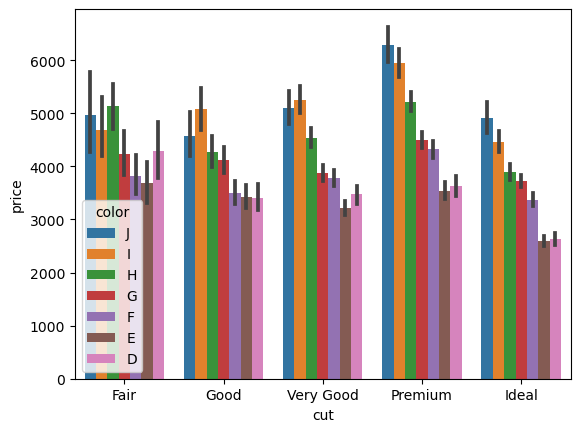

In [346]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);#bir boyut daha ekledik.(color kategorik değişkenini hue argümanı ile ekledik)
                                                            #Örneğin İdeal sınıfı price'ın yüksek seviyelerinde yoğundu, peki cut'un ideal sınıfının içerisindeki bu yapılanma neden oluşuyor.
                                                              #E sınıfı ile D sınıfı idealin price'ın yüksek seviyelerini oluşturduğu gruplanmada bu sınıfı aşağı çekiyor. I ve J sınıfı yukarıya taşıyor.
                                                              #Daha fazla açıklanabilirlik elde ettik.

In [347]:
#Yukarıdaki grafikte price eksenindeki değerler iki kategorik değişken bir arada bulunduğunda price değişkeninin ortalamasıdır. Üzerine konulan çubuklar ise standart sapma değerleridir.
#Örneğin İdeal sınıfına incelediğimizde E color rengine ait mücevherlerin fiyatları ortalama 2500'ler civarındaymış. Grafikten bunu anlayabiliyoruz.Premium sınıfındaki J en yukarıdaki fiyata sahiptir.

In [348]:
df.groupby(["cut","color"])["price"].mean()#Yukarıdaki grafiği doprulayalım. groupby (çift gruplama) işlemi yapıyoruz.Sonra price değişkenine göre bir ortalama yap demek istiyoruz. 

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

## Histogram ve Yoğunluk (Sayısal Değişken)
Sayısal değişkenlerin dağılımını ifade etmek için kullanılan veri görselleştirme teknikleridir.
Histogram elimizdeki sayısal değişkenleri belirli aralıklara böler ve bu belirli aralıkların gözlenme sayısını yansıtır. Değişkenimizin belirli aralıklardaki dağılımları ile ilgili bilgiler verir.

In [349]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


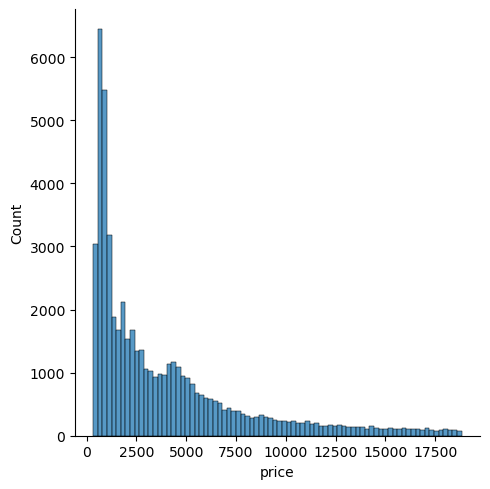

In [350]:
sns.displot(df.price);

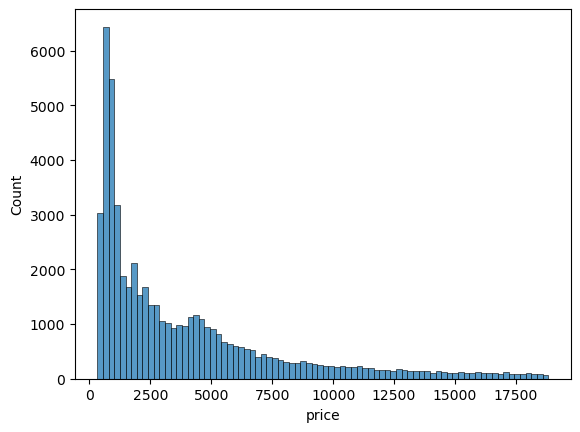

In [75]:
sns.histplot(df.price); #displot ile aynı işlevi yerini getirir.

In [246]:
df["price"].describe() #betimsel özelliklerini ver

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

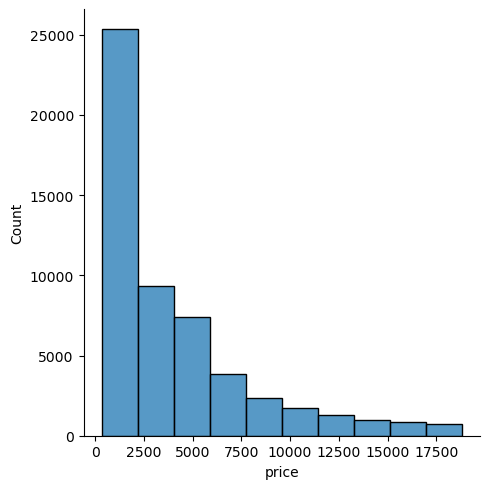

In [352]:
sns.displot(df.price, bins = 10); # bins ile bölünen aralıkları belirlenir. Bu parametreyi 10 yaparsak değişkenin değerli 10 eşit aralığa ayrılır ve değişkenin o aralıklardaki dağılımı gösterilir.10 sütun gözlenir.

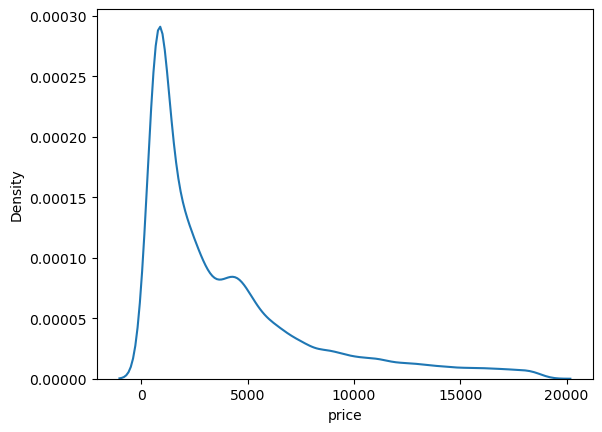

In [353]:
sns.kdeplot(df.price); # yoğunluğu gösteren çizgi # ölçeği 0 ile 1 arasına alarak çizer
#Her iki grafik de (histogram, yoğunluk) sayısal değişkenin dağılımını görmek için kullanılır ikisini de kullanabiliriz.


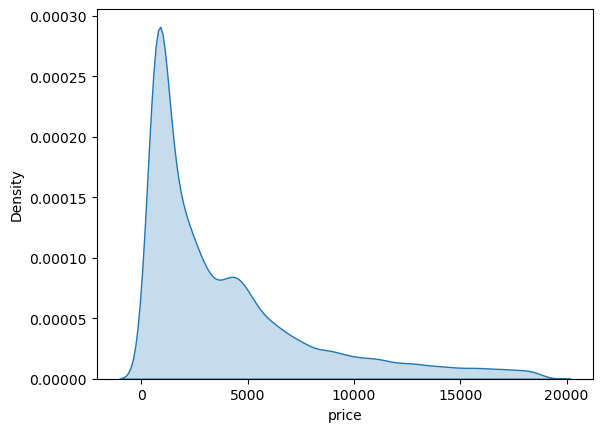

In [355]:
sns.kdeplot(df.price, fill="true"); #yoğunluk fonksiyonunun altını doldurduk

## Çaprazlamalar


In [356]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


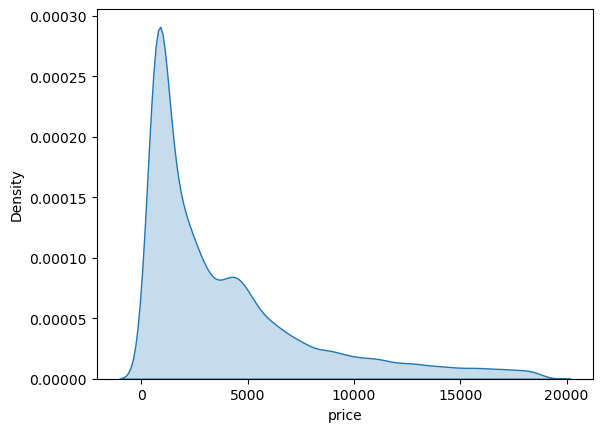

In [357]:
sns.kdeplot(df.price, fill = True);
#şekle bakıldığında 2 tepe olduğu görülüyor. Bu genelde şu demektir. Odaklanılan sayısal değişkenin içerisindeki bilgiyi oluşturan birden fazla faktör var demektir.

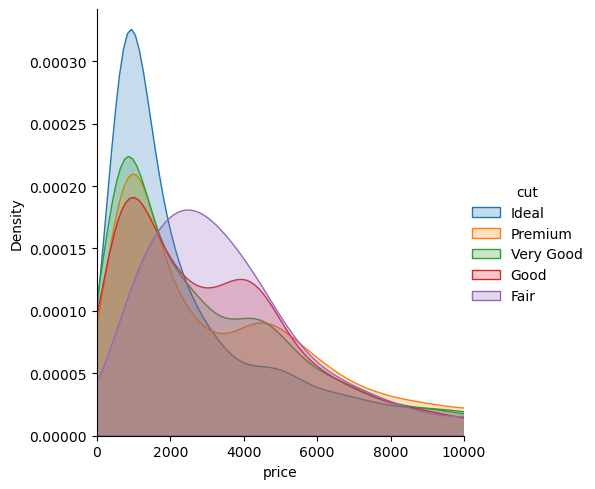

In [359]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "price", fill= True) #price'a göre yoğunluk grafiği oluşturacağız fakat bunun üzerine boyut ekleyeceğiz (cut kategorik değişken).map ile eklediğimiz boyut ile kde grafiğini eşliyoruz.
 .add_legend() #cut kategori değişkeninin sınıf bilgilerini eklemek için kullanıyoruz.
); # Bu fonksiyon grafik üzerine eklenen boyutları bölerek göstermek için kullanılır.hue, boyut ekleme parametresi

In [360]:
#Eğer sadece price değişkenine ait olan grafiğe baksaydık bazı detayları gözden kaçırmış olacaktık. Cut (kaliteye ilişkin) kategorik değişkenin ideal isimli sınıfı aslında yükseklerde yer alan bir sınıftır. Ama price sınıfındaki dalgalanmalara bakıldığında ideal sınıfı price'ın 0 ile 2000 arasında diğerlerine göre daha fazla yer kapladığı görülüyor.
#6000'den sonra hepsinin frekansları aşağı yukarı aynı olmuş, yani aslında her kalitede benzer fiyatlarda ürün olabileceği yorumunu yapabiliriz.

In [361]:
df.groupby(["cut"])["carat"].mean()

cut
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Good         0.849185
Fair         1.046137
Name: carat, dtype: float64

## Boxplot (Kutu grafiği) (Sayısal Değişken)
Elimizdeki sayısal sürekli değişkenleri görselleştirmek için sık kullanılan bir grafiktir.

### Veri Seti Hikayesi
Bir restoranttaki bazı eylemler sonucu oluşan seaborn içerisindeki "tips" veri seti.

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil) #buradaki ana odaklanması gerekilen değişken bu değişken olabilir

tip: bahşiş #bu değişkende ana değişken veya üzerinde çok fazla analiz,  yorum yapılabilecek bir değişken olabilir.

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [362]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [364]:
#hiç eksik gözlem(değer) var mı
df.isnull().values.any() # isnull() values üzerinde bir sorgulama yap herhangi birisinde (any) eksik değer varsa true olarak dön.

False

In [365]:
df.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir. Hangi değişkende ne kadar eksik var sorusuna cevap alırız.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [366]:
df.describe().T #betimsel özelliklerine göz attık

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [367]:
#Sorular türetelim Keşifçi Veri Analizi)
# - Acaba yemek yiyen kişi sayısı fazla olduğunda bahşiş nasıl değişiyor? Aralarında bir ilişki var mı?
# -Yemek yiyen grupta sigara içen bir kişi varsa veya yoksa bu durum hesaplara bahşişlere yansıyor mudur?
# - Veya hesabı ödeyen kişinin cinsiyeti hesabı veya bahşişi etkiliyor mu?


#Kategorik değişkenleri de tanıyalım

In [368]:
df["sex"].value_counts() #sex kategorik değişkenine ait sınıfların sayıları

Male      157
Female     87
Name: sex, dtype: int64

In [369]:
df["smoker"].value_counts() #smoker kategorik değişkenine ait sınıfların sayıları

No     151
Yes     93
Name: smoker, dtype: int64

In [370]:
df["day"].value_counts() #day kategorik değişkenine ait sınıfların sayıları

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [371]:
df["time"].value_counts() #time kategorik değişkenine ait sınıfların sayıları

Dinner    176
Lunch      68
Name: time, dtype: int64

## Boxplot


In [372]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


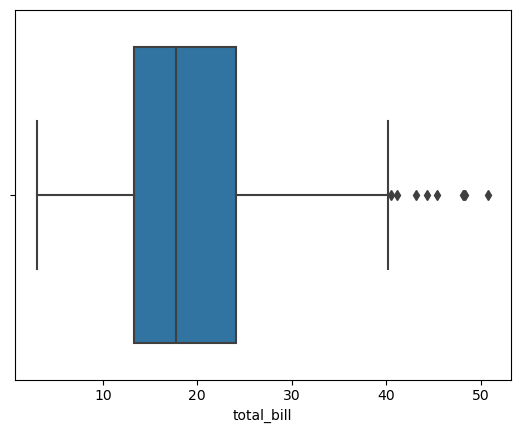

In [373]:
sns.boxplot(x = df["total_bill"]); # kartiller aracılığıyla çok değerli bilgi sunan bir görselleştirme tekniğidir.
#en soldaki çizgi (bıyık) minimum değeri ifade eder, kutunun solundaki bitiş çizgisi %25'liğinci değer, kutunun ortasındaki çizgi medyan yani %50. değer, kutunun sağındaki bitiş çizgisi %75'lik değere karşılık gelen değer, en sağdaki çizgi (bıyık) maksimum değer.
#En sağdaki noktalar aykırı değerlerdir. İleride veri ön işleme aykırı değer konusunda değineceğiz.

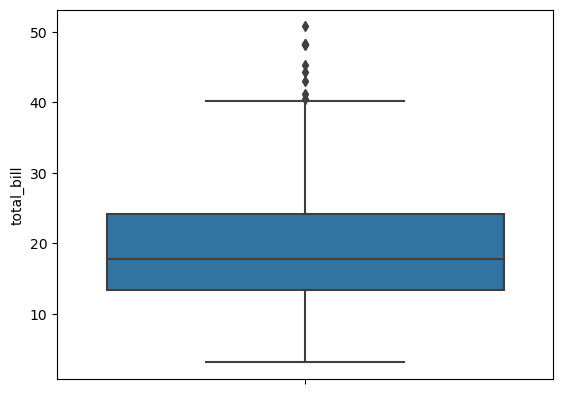

In [374]:
sns.boxplot(y = df["total_bill"], orient = "v"); #boxplotu dikey hale getirdik

## Çaprazlamalar

In [375]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [270]:
#Hangi gunler daha fazla kazanıyoruz? Yöneticimiz bunu bilmek istiyor ki ona göre aksiyon alabilsin.
#groupby tekniği ile bir ortalama aldığımızda da bulabiliriz. Fakat görsel tekniklerle yapalım.

In [271]:
df.groupby(["day"])["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

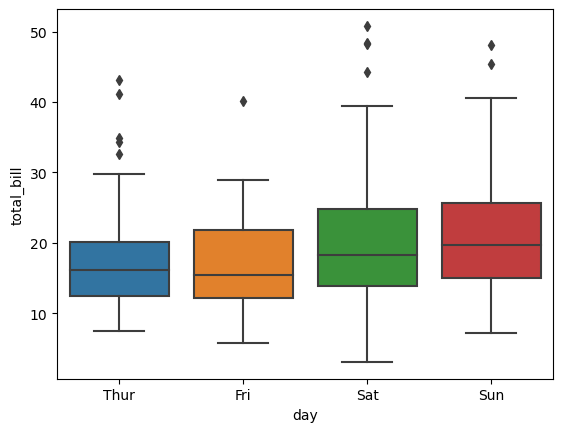

In [376]:
sns.boxplot(x = "day", y = "total_bill", data = df); # x eksenine gün, y eksenine toplam ödenen hesabı koyalım
#biz frekanslara baktığımızda saturday (cumartesi) gününde daha fazla müşteri geldiğini biliyoruz. Fakat grafikten görüleceği üzere, pazar günü daha az müşteri geldiği halde bu günde bırakılan miktarların daha fazla olduğu gözlemleniyor.

In [377]:
#sabah mı akşam mı daha çok kazanıyoruz?

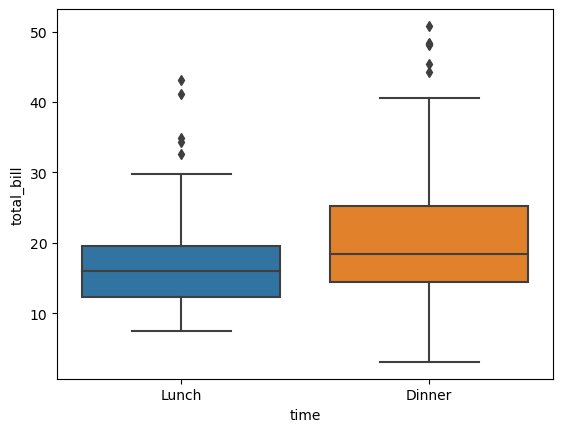

In [378]:
sns.boxplot(x = "time", y = "total_bill", data = df); #grafikten görüleceği üzere akşam daha çok kazanıyoruz. bu durumda restorant sahibi olarak şöyle birey yapabiliriz. İş yerinde bulunan en deneyimli, müşterilerle ilgilenmesi bilen garsonlarımızı genellikle haftasonları ve akşamları çalıştırırız.
#Veriye bakarak böyle bir çıkarım yapılabilir.

In [379]:
#kisi sayısı kazanc arasındaki ilişkiye bakalım

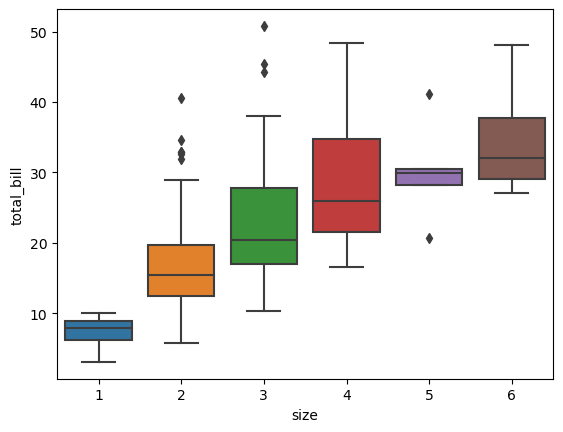

In [380]:
sns.boxplot(x = "size", y = "total_bill", data = df);


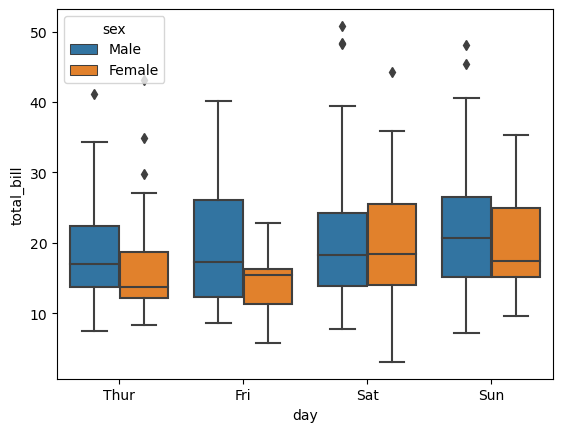

In [381]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df); #üçüncü boyut ekleyelim hue parametresi ile
#gözlemleneceği üzere kadınların hesap ödemesi durumuna bakıldığında cumartesi dışında yüksek bir hesap ödeme söz konudu değildir.


# Korelasyon Grafikleri
Korelasyon; değişkenler arasındaki ilişkiyi ifade eden istatistiksel bir terimdir.
İki değişken arasındaki ilişkiyi görselleştirmek için en çok kullanılan scatterplot (saçılım grafiği) 'dir. Bize sayısal değişkenler arasındaki ilişkiyi gösterir.
Bu bölümde iki sayısal değişkenin birlikte oluşturdukları yapıları göreceğiz. Bunun üzerine boyut olarak farklı değişkenler de ekleyeceğiz.

## Scatterplot

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [382]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


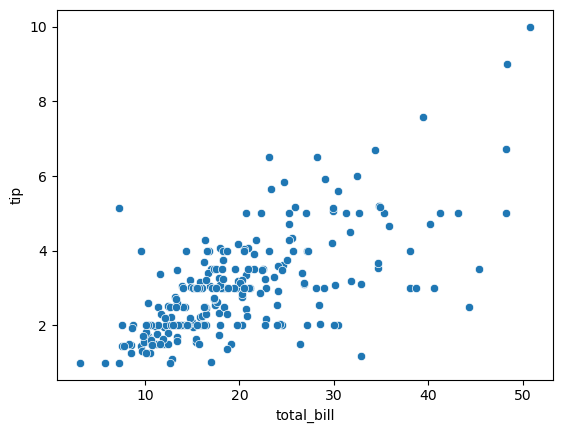

In [383]:
sns.scatterplot(x = "total_bill", y = "tip", data = df); # toplam ödenen tutar ve bahşiş arasındaki ilişkiyi inceleyelim.
#şöyle bir yorum yapabiliriz, toplam ödenen hesap arttıkça bahşişlerde bir artma gözlenmiş.

## Çaprazlamalar

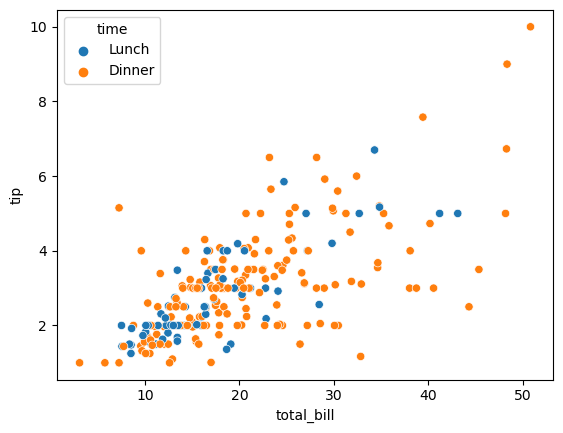

In [384]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time",data = df); #hue ile time kategorik değişkeni boyut olarak ekleyelim
#Akşam yemeklerinde ödenen hesap arttıkça bahşişlerin artması durumunun gözlenmesi devam etmiş fakat diğer öğünde tam olarak böyle olmamış

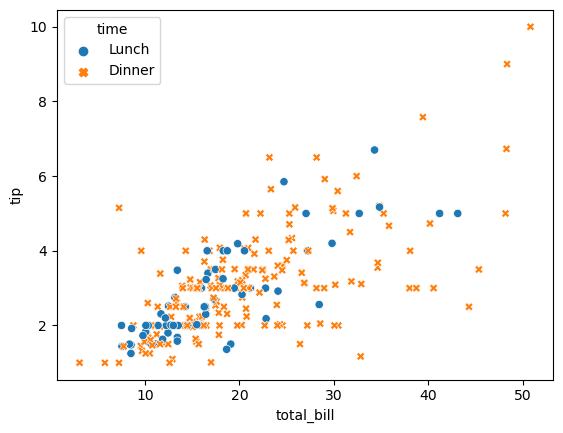

In [385]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);#style time kategorik değişkeninin sınıflarına göre grafikteki görsel şeklinin farklı olmasını sağlıyor

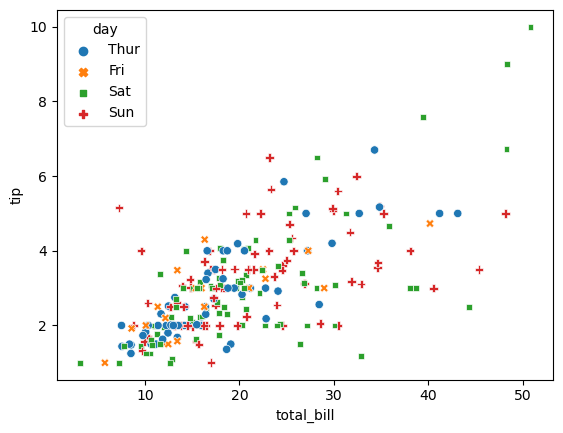

In [386]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "day", data = df);#4 farklı gün olduğu için 4 farklı şekil verir

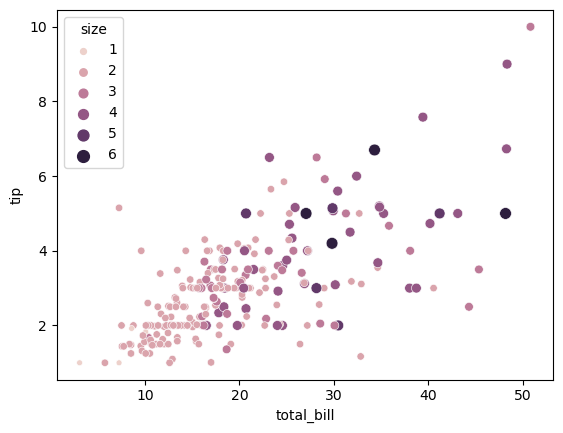

In [387]:
sns.scatterplot(x = "total_bill", y = "tip", hue= "size", size = "size", data = df);#küçükten büyüğe doğru yuvarlaklar işaretlenmiş büyük olması masadaki kişi sayısının fazla küçük olması az olduğu anlamına gelir.

## Doğrusal İlişkinin Gösterilmesi
Saçılım aracılığı ile sunulan bilgiyi bir de doğru aracılığı ile görebiliyoruz.

In [388]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [389]:
import matplotlib.pyplot as plt # matplotlib içerisinden pypplot isimli fonksiyonlu plt ismiyle import ettik

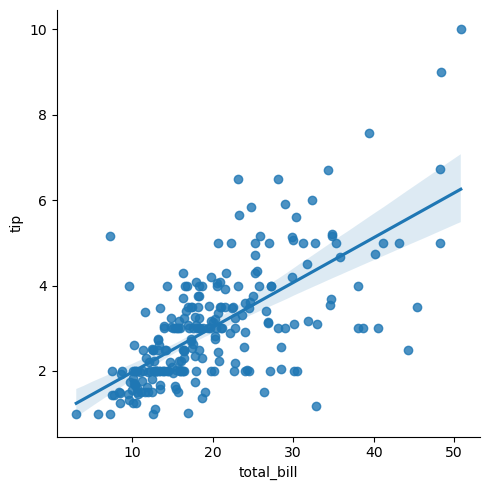

In [391]:
sns.lmplot(x = "total_bill", y = "tip", data = df);
#doğrunun etrafındaki açık renkli maviler sapmaları ifade ediyor. 

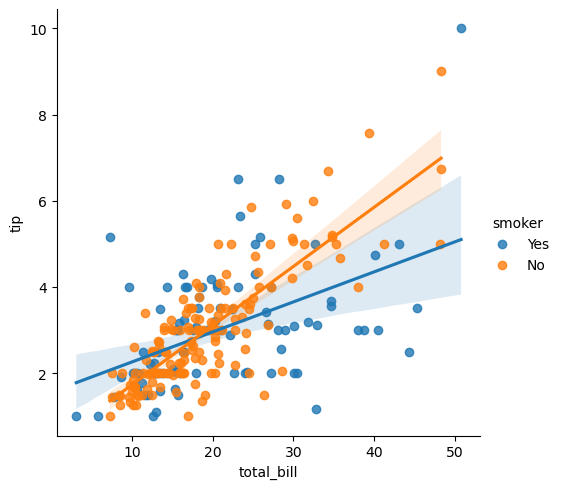

In [392]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);#üçüncü boyut olarak hue ile smoker kategorik değişkenini koyduk.
#Doğruların eğimlerinin farklı olduğunu görüyoruz. Doğrunun eğimi yapacak olduğumuz yorumların şiddetini ifade eder.
#Eğer doğrumuz turuncudaki gibiyse çok şiddetli bir şekilde ödenen hesap arttıkça bahşişler artmaktadır deriz. Fakat bu yorumu sigara içmeyenler için bu şekilde yapabiliyoruz. Sigara içenler göz önünde bulunduruldupunda bu artışın şiddetinin bu kadar güçlü olmadığını mavi doğrudan söyleyebiliriz. Çünkü eğim düşmüş azalmış.


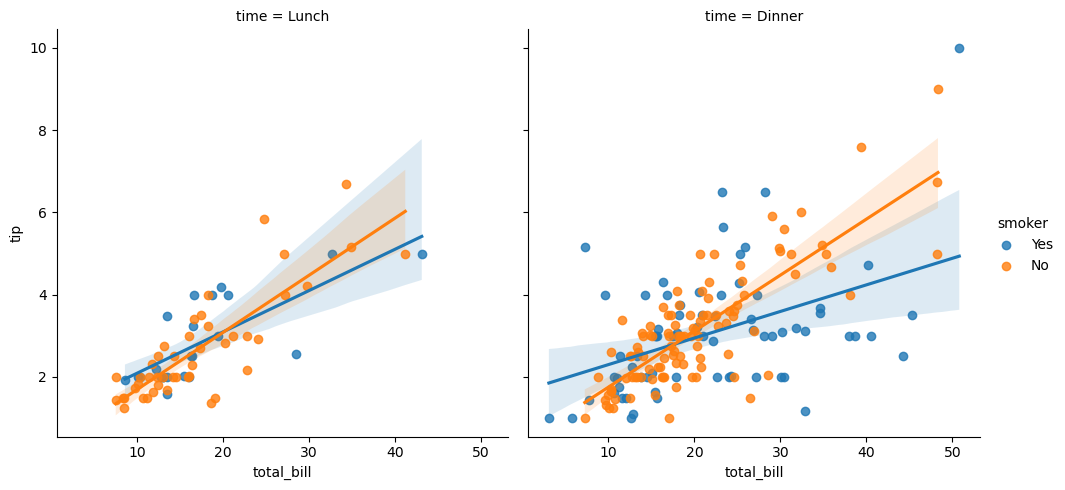

In [393]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df); # col parametresi grafiği verilmiş olan bir kategorik değişkene göre kategori sayısına böler
#Öğünlere göre de eğimlerin nasıl değiştiği gözlemlenebilir.Eğimlerde bir fark var ama dikkate alınacak kadar mı? Bu fark anlamlı mı? (İstatistiksel Analiz testleri ile ölçülebilir)

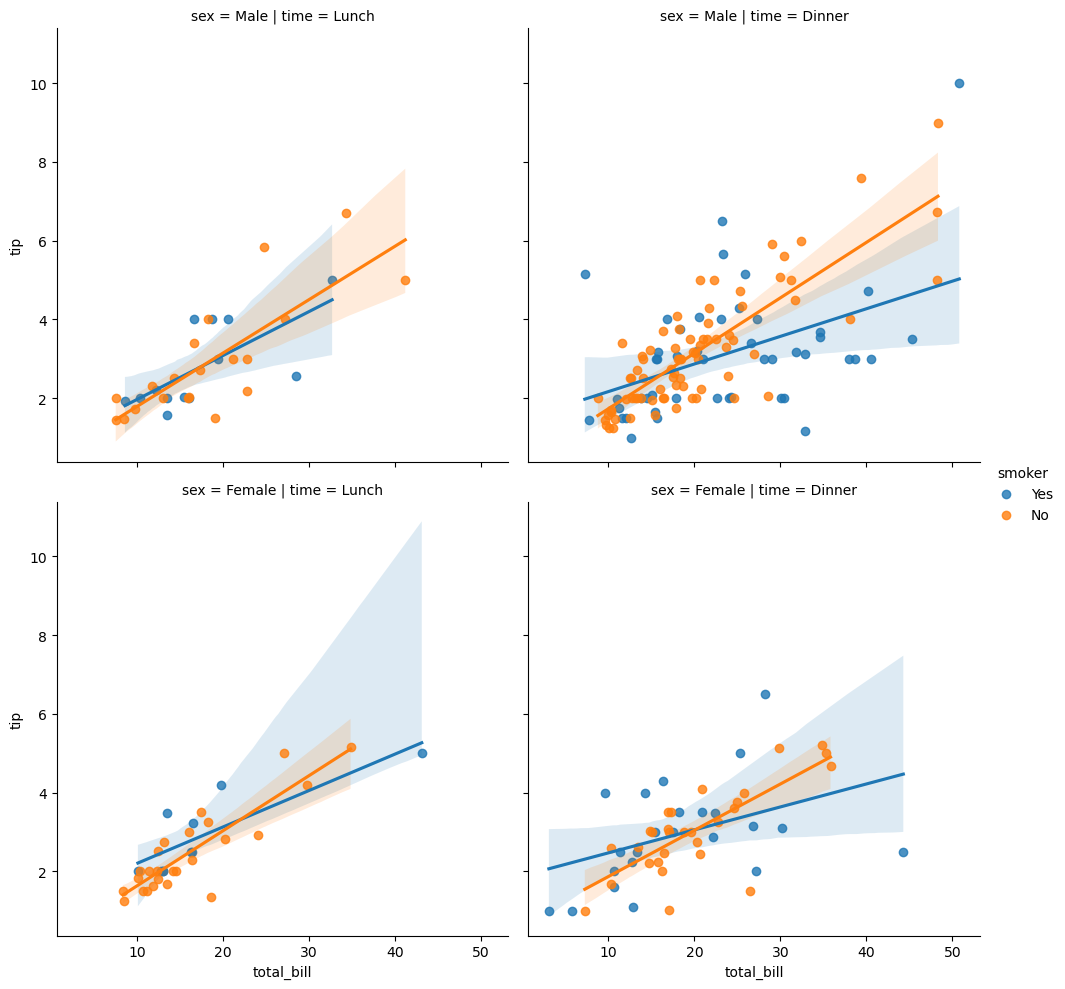

In [394]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df); #sütunlara göre time, satırlara göre sex kategorilerinde ödenen hesap ile ödenen bahşiş arasındaki ilişki değerlendirilir.
#doğru eğimlerinin, eğimler etrafındaki standart sapmaların ne kadar değiştiği gözlemlenebilir.

# Heatmap
Isı Haritası, elimizdeki değişkenleri yapısal anlamda daha geniş perspektiften görmek istediğimizde kullanılabilecek olan bir grafik görselleştirme yöntemlerinden biridir. Uzun vadeli verilerde yani içerisinde zaman serisi verileri olduğunda yani yıl ve ay gibi veriler olduğunda bu dönemlere karşılık gözlemlenecek olan bazı sayısal değişken değerleri olduğunda yada bunun dışında daha büyük ölçekli belirli periyotlarla tekrarlanan olayları görmek istediğimizde bize çok güzel bilgiler sunan bir grafiktir. Sadece zamansal bağlamda değil, eğer elimizde çok sınıflı bir kategorik değişken ve bunu belirli bir sayısal değişken açısından görselleştirme ihtiyacımız varsa bu durumda da çok işe yaramaktadır.

## Veri Seti Hikayesi

In [395]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [396]:
#veri setinde yıllara ve aylara göre yolculuk sayıları ifade edilmektedir.

In [397]:
df.shape

(144, 3)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [301]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [302]:
df["month"].value_counts()

Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: month, dtype: int64

In [303]:
#heatmap fonksiyonu bizden daha yapısal bir formda dataframe istiyor.Bunu gerçekleştirmenin yolu da bu dataframe'i önce bir pivot işlemine tabi tutmak.

In [304]:
sns.heatmap(df);

ValueError: could not convert string to float: 'Jan'

In [399]:
df2=df.pivot_table("passengers", index = "month", columns = "year")

In [400]:
df2

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


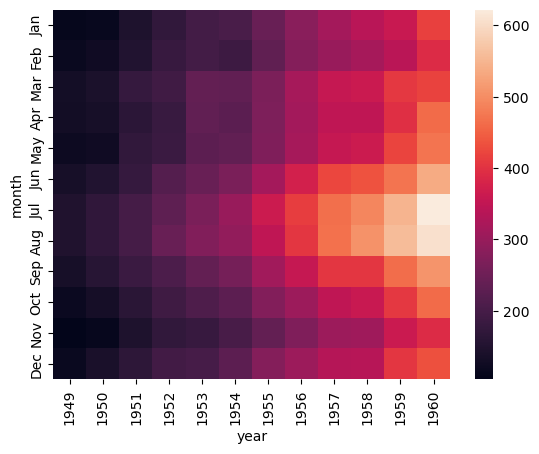

In [401]:
sns.heatmap(df2);
#yıllar bazında sağa doğru gittikçe grafikte aydınlanma var. Bu da yıllar geçtikçe insanların uçuşu tercih etmelerinin arttığını görüyoruz.
#Ay bazında bakarsak da haziran, temmuz ve ağustosta da geçmiş yıllarda bile daha fazla yolcu uçuşu tercih etmiştir.Yaz aylarına gelindikçe yolcu sayılarında artış gözlendiği gözlemlenmiştir.

In [166]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

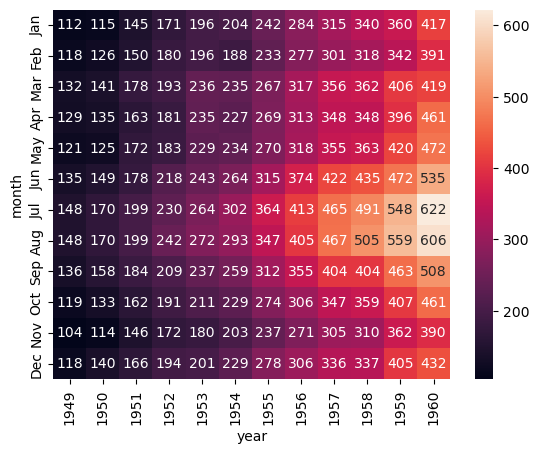

In [402]:
sns.heatmap(df2, annot = True, fmt = "d"); #sayıları da gözlemleyebiliriz.

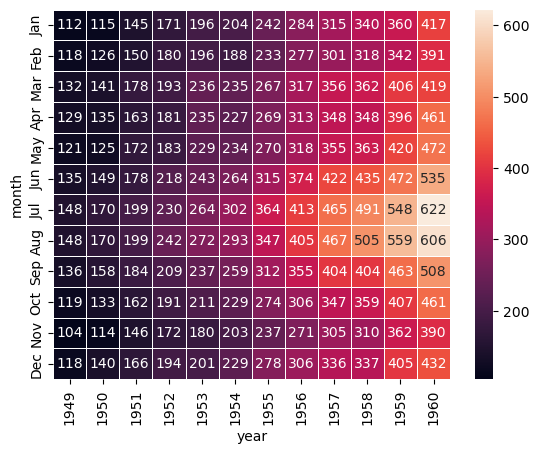

In [403]:
sns.heatmap(df2, annot = True, fmt = "d", linewidths = .5);#okunması kafa karıştırıyor arasına çizgi çekelim dersek bu şekilde yapabiliriz.

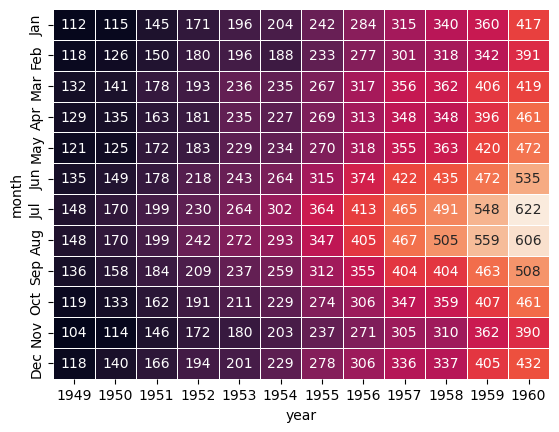

In [312]:
sns.heatmap(df2, annot = True, fmt = "d", linewidths = .5, cbar = False); #renk plaetini kaldırabiliriz.

# Çizgi Grafik
Diğerlerine göre daha zor problemlerde kullanılan bir görselleştirme tekniğidir. Zamana bağlı değişkenlerin olduğu veri setlerinde ve nesnelerin interneti gibi senaryolarda makinelerin ürettiği verileri görselleştirmek için kullanabileceğimiz bir veri görselleştirme tekniğidir.

## Veri Seti Hikayesi
fmri veri seti, beyne bağlanan bir cihaz aracılığı ile toplanan sinyalleri ifade eden bir veri setidir.
* subject: Verilerin toplandığı kişileri ifade ediyor.
* timepoint: zaman noktalarını ifade ediyor
* event: verinin toplanmasıyla ilgili birbirinden farklı olayları ifade ediyor.
* region: sinyalin toplandığı bölgeleri ifade ediyor
* signal: gelen sinyali ifade ediyor.

In [404]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [405]:
df.shape

(1064, 5)

In [315]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [316]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [406]:
df.groupby("timepoint")["signal"].count()#her bir zaman noktasında acaba eşit sinyal mi var görmek için groupby yaptık. timepoint değişkenine göre sinyali grupla ve sayısını ver.Gördüğümüz üzere her bir zaman noktasında eşit sayıda sinyal toplanmış.

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [318]:
df.groupby("timepoint")["signal"].describe()#zaman noktalarına göre sinyallerin betimsel özelliklerini verir.

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi Grafik ve Çaprazlamalar

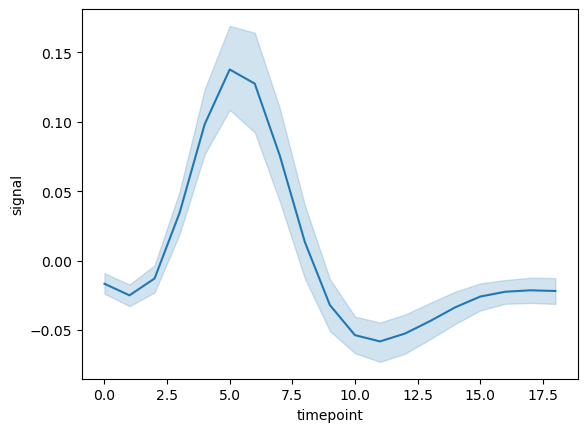

In [407]:
sns.lineplot(x = "timepoint", y = "signal", data = df);#zaman noktalarına göre sinyallerin artış ve azalımlarına göre bilgi verilmiş. Açık mavi alanlar standart sapmalar ile oluşturulmuş güven aralıklarını düz mavi çizgi o noktalardaki ortalama sinyal değerini veriyor.

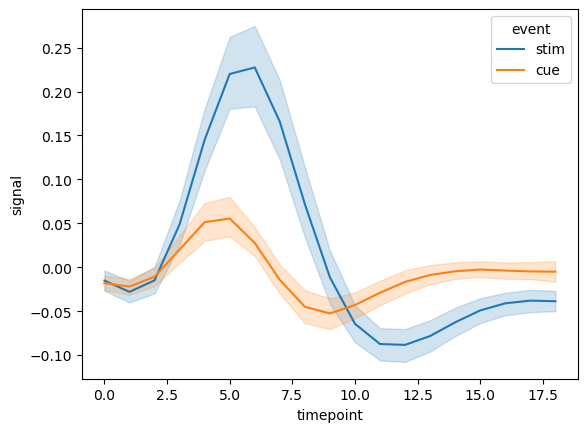

In [321]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);#hue parametresi ile 3. bir boyut ekliyoruz (evet olayı)
#olay türü stim olan kategorik değişken yüksek pik değerini sağlıyormuş grafikten onu anlıyoruz.

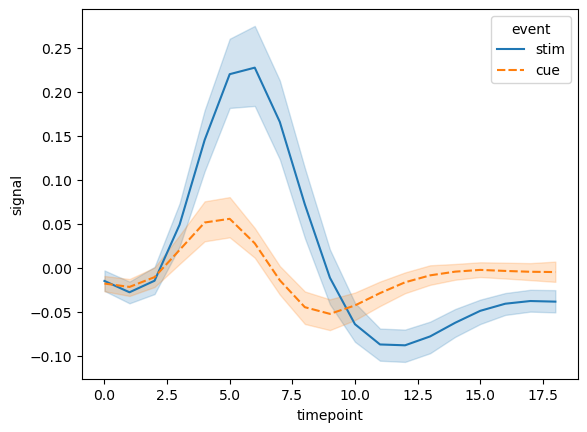

In [322]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);#eventleri farklı şekillerde temsil ettik

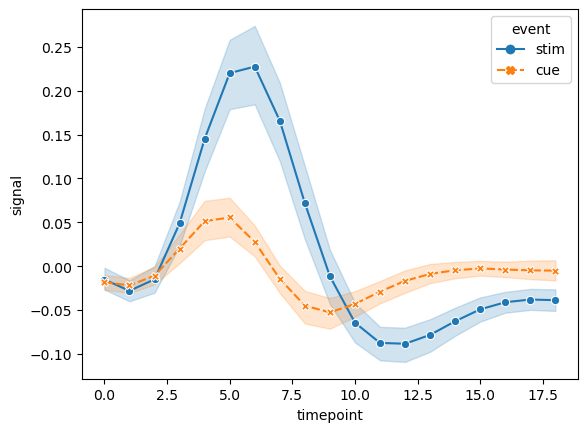

In [323]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True, data = df);#stillere marker ekledik. 

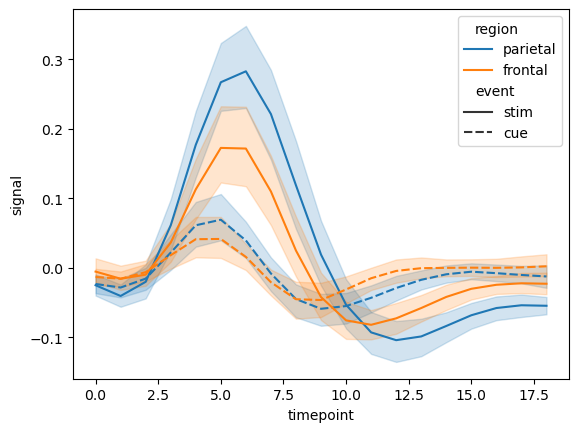

In [379]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             data = df); #bir boyut daha ekleyelim

## BÖLÜM SONU
* Dağılım Grafikleri

* Korelasyon Grafikleri

* Isı Haritaları

* Çizgi Grafik

In [ ]:
# Violin 
    * Kutu grafiğine benzerdir. 
    * Biraz daha dağılım anlamında bize bilgi sunar. 
    * Yoğunluk grafiği ile kutu grafiğinin kesişimi gibi düşünülebilir.
# Scatterplot Matrisi 
    * Veri seti içerisindeki tüm sayısal değişkenler için ilişkileri ifade ettiğimizde bir scatterplot matrisi  oluşturmuş oluyoruz.
    * Scatterplot, lmplot, Yoğunluk  Fonksiyonu grafiklerini bir arada barındırır
# Basit Zaman Serisi Grafiği